In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# 1.Регуляризация

Метод регуляризации заключается в "штрафовании" модели за слишком большие веса путем добавления нового члена к среднеквадратичной ошибке:

$$Q(w, X) + \lambda ||w||^{2} \rightarrow \underset{w}{\text{min}}.$$

добавленный член $\lambda ||w||^{2}$ - _квадратичный регуляризатор_, который представляет собой $L_{2}$-норму вектора весов, то есть сумму квадратов весов $\sum^{d}_{j=1}w_{j}^{2}$, коэффицент $\lambda$ при нем - коэффициент регуляризации. Чем больше его значение, тем меньшая сложность модели будет получаться в процессе такого обучения. Если увеличивать его, в какой-то момент оптимальным для модели окажется зануление всех весов. В то же время при слишком низких его значениях появляется вероятность чрезмерного усложнения модели и переобучения. Выбор оптимального значения этого коэфициента является отдельной задачей и заключается в многократном обучении модели с разными его значениями и сравнении их качества.

По сути, смысл регуляризации заключается, как и в обычном обучении, в минимизации функционала ошибки, только в данном случае добавляется условие **непревышения нормой вектора весов** некоторого значения $||w||^{2}\leq C$, то есть ограничение весов, что и будет залогом избежания переобучения.

Описанный выше метод с использованием $L_{2}$-нормы вектора весов в качестве регуляризатора называется _$L_{2}$-регуляризацией_. По аналогии существует также _$L_{1}$-регуляризация_, использующая в качестве регуляризатора $L_{1}$-норму вектора весов, то есть сумму модулей весов.

$$||w||_{1} = \sum^{d}_{j=1}|w_{j}|.$$

$L_{2}$-регуляризатор представляет собой **непрерывную гладкую функцию**, поэтому его добавление не усложняет использование градиентных методов оптимизации, так как в каждой его точке существует производная. $L_{1}$-регуляризатор уже не является гладкой функцией, так как в нем есть модуль, у которого не существует производной в нуле. То есть его использование усложняет градиентные методы оптимизации, если необходимо будет искать производную в нуле. Однако, L1 регуляризация обладает интересной особенностью, заключающейся в занулении некоторых весов при его применении. Иными словами, происходит отбор признаков, в результате чего остаются только самые важные признаки. Обычно сначала подбирают порядок регуляризации(e^-1, e^-2, и.т.д). Далее
параметр можно подбирать более точнее. Далеко не всегда линейная модель чувствительна к гиперпараметрам, поэтому можно ограничиться только подбором порядка регуляризации.

# 2. Стохастический градиентный спуск

Если расписать $j$-ю компонетну градиентного спуска, то получим

$$\frac{\partial Q}{\partial w_{j}} = \frac{2}{l}\sum^{l}_{i=1}x^{j}_{i}(\left \langle w,x_{i} \right \rangle - y_{i}),$$

то есть суммирование по всем $l$ объектам обучающей выборки. Здесь выражение под суммой показывает, как нужно изменить $j$-й вес, чтобы как можно сильнее улучшить качество __на объекте $x_{i}$__, а вся сумма показывает, как нужно изменить вес, чтобы улучшить качество на __всей выборке__.

В этой формуле отражен один из главных недостатков градиентного спуска: если выборка большая по объему, то даже один шаг градиентного спуска будет занимать много вычислительных ресурсов и времени.

Стремление к оптимизации процесса привело к появлению _стохастического градиентного спуска_ (Stochastic gradient descent, SGD). Идея его основана на том, что на одной итерации мы вычитаем не вектор градиента, вычисленный по всей выборке, а вместо этого случайно выбираем один объект из обучающей выборки $x_{i}$ и вычисляем градиент только на этом объекте, то есть градиент только одного слагаемого в функционале ошибки и вычитаем именно этот градиент из текущего приближения вектора весов:

$$w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, \{x_{i}\}),$$

то есть $\nabla Q(w^{k-1}, X)$ заменяется на $\nabla Q(w^{k-1}, \{x_{i}\})$.

Если в случае градиентного спуска мы стараемся на каждой итерации уменьшить ошибку на всей выборке, и по мере увеличения числа итераций ошибка падает монотонно, то в случае стохастического градиентного спуска мы уменьшаем на каждой итерации ошибку **только на одном либо нескольких объектах**, но при этом есть вероятность увеличить ее на другом объекте, поэтому график изменения ошибки может получаться немонотонным, и даже иметь пики. То есть на какой-то итерации мы можем даже увеличить ошибку, но при этом в целом по ходу метода ошибка снижается, и рано или поздно мы выходим на нормальный уровень. Также, как и в обычном 
градиентом спуске, в итоге находим оптимальные значения весов с использованием информации на предыдущей итерации.

# 3. Примеры

## 3.1 Сравнение градиентного спуска и стохастического градиентного спуска

Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [2]:
n_samples = 1000
n_features = 3
n_informative= 2
n_targets = 1
noise = 5
rng = np.random.RandomState(42)
X, y, coef = make_regression(n_samples, n_features, n_informative, n_targets, 
                             noise, coef = True, random_state = rng)

In [3]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

**Градиентный спуск**

In [354]:
def eval_gd_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    errors = []
    num_iterations = []
    
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot(X.T, (y_pred - y))))
        
        if i % (iterations / 5) == 0:
            errors.append(err)
            num_iterations.append(i)
    
    return num_iterations, errors 

**Стохастический градиентный спуск**

In [359]:
def eval_sgd_model(X, y, iterations=None, batch_size=None, alpha=None):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // batch_size #количество элементов в 'порции'
    if n % batch_size != 0: #если количество элементов нечётное
        n_batch += 1
        
    errors = []
    num_iterations = []
    
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = batch_size*b #вычисляем индексы объектов, которые должны попасть
            end_ = batch_size*(b+1) #вычисляем индексы объектов, которые должны попасть

            # print(b, n_batch, start_, end_)

            X_tmp = X[:, start_ : end_] #выбор элемента
            y_tmp = y[start_ : end_] #выбор элемента
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))

        if i % (iterations / 5) == 0:
            errors.append(err)
            num_iterations.append(i)
    
    return num_iterations, errors

In [362]:
%%time
num_iterations_gd, errors_gd = eval_gd_model(X, y, iterations=500, alpha=0.01)

Wall time: 30.9 ms


In [364]:
%%time
num_iterations_sgd, errors_sgd = eval_sgd_model(X.T, y, iterations=500, batch_size=1, alpha=0.01)

Wall time: 18 s


**Batch - реализация**

Batch_size обычно выбирают как 2^n(т.е. 16, 32, 64, и.т.д). Чем он меньше тем лучше, поскольку чем чаще будем обновлять веса, тем быстрее добьёмся сходимости.

![title](batch.png)

In [365]:
%%time
num_iterations_batch, errors_batch = eval_sgd_model(X.T, y, iterations=500, batch_size=4, alpha=0.01)

Wall time: 4.65 s


In [366]:
plots = []
plots.append(('Классическая реализация', num_iterations_gd, errors_gd))
plots.append(('Стохастический градиентный спуск', num_iterations_sgd, errors_sgd))
plots.append(('Батч-реализация', num_iterations_batch, errors_batch))

In [436]:
plots

[('Классическая реализация',
  [100, 200, 300, 400, 500],
  [392.2210087203734,
   33.3674252506901,
   25.059960387061416,
   24.864221052727487,
   24.859558165950155]),
 ('Стохастический градиентный спуск',
  [100, 200, 300, 400, 500],
  [172.6417069214218,
   5.686821232335924,
   22.372040836084164,
   25.883270520387576,
   26.44562882415334]),
 ('Батч-реализация',
  [100, 200, 300, 400, 500],
  [133.51303713729504,
   23.25594752967763,
   25.402195119275596,
   26.10121549262888,
   26.21063739991045])]

In [409]:
def iter_mse(data):
    plt.figure(figsize=(16, 6))
    plt.plot(plots[0][1], plots[0][2], c='b')
    plt.plot(plots[1][1], plots[1][2], c='r')
    plt.plot(plots[2][1], plots[2][2], c='g')
    
    plt.legend((plots[0][0], plots[1][0], plots[2][0]),
               loc='upper right')

    plt.title('Зависимость среднеквадратичной ошибки от числа итераций', fontsize=16)
    plt.xlabel('Число итераций')
    plt.ylabel('Среднеквадратичная ошибка')

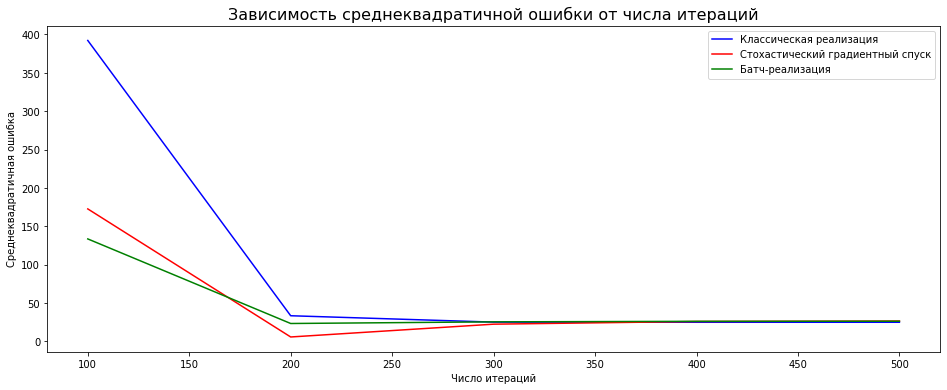

In [410]:
iter_mse(plots)

Если остановить реализацию между 100 и 200 итерациями (задать критерий остановки), то получим следующие результаты.
SGD сходится быстрее всех, на втором месте батч-реализация. Худший результат показала классическая реализация. Однако, классическая реализация оказалась более точной на большем числе итераций.Время, затраченное на реализацию каждого из вариантов обратно пропорционально обозначенным результатам.
Более высокая скорость обучения была подобрана заранее.

## 3.2. Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации и сравнить результаты.

Добавим L2 норму.

In [440]:
def eval_gd_model_reg_2(X, y, iterations, alpha=None, lambda_=None):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    errors = []
    num_iterations = []
    
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot(X.T, (y_pred - y))) + 2 * lambda_ * W)
        
        if i % (iterations / 5) == 0:
            errors.append(err)
            num_iterations.append(i)
    
    return num_iterations, errors

In [468]:
%%time
num_iterations_gdreg2, errors_gdreg2 = eval_gd_model_reg_2(X, y, iterations=500, alpha=0.01, lambda_=1e-15)

Wall time: 17.9 ms


In [469]:
errors_gdreg2

[385.35857573673036,
 33.23051845326555,
 25.05704976819446,
 24.864156103647836,
 24.859556667411567]

In [442]:
def eval_sgd_model_reg2(X, y, iterations=None, batch_size=None, alpha=None, lambda_=None):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // batch_size #количество элементов 
    if n % batch_size != 0: #если количество элементов нечётное
        n_batch += 1
    
    errors = []
    num_iterations = []
    
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = batch_size*b #вычисляем индексы объектов, которые должны попасть
            end_ = batch_size*(b+1) #вычисляем индексы объектов, которые должны попасть

            # print(b, n_batch, start_, end_)

            X_tmp = X[:, start_ : end_] #выбор элемента
            y_tmp = y[start_ : end_] #выбор элемента
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)) + 2 * lambda_ * W)

        if i % (iterations / 5) == 0:
            errors.append(err)
            num_iterations.append(i)
    
    return num_iterations, errors

In [466]:
%%time
num_iterations_sgdreg2, errors_sgdreg2 = eval_sgd_model_reg2(X.T, y, iterations=500, batch_size = 1, alpha=0.01, lambda_=1e-15)

Wall time: 8.01 s


In [467]:
errors_sgdreg2

[182.6651318688475,
 5.454872252376852,
 22.310434537352993,
 25.874334048328006,
 26.44439029736652]

In [470]:
%%time
num_iterations_batchreg2, errors_batchreg2 = eval_sgd_model_reg2(X.T, y, iterations=500, batch_size = 4, alpha=0.01, lambda_=1e-15)

Wall time: 2.03 s


In [471]:
errors_batchreg2

[131.35661826736697,
 23.04947985085215,
 25.37959970525829,
 26.09842814077929,
 26.21027949829454]

In [445]:
reg2_plots = []
reg2_plots.append(('Классическая реализация', num_iterations_gdreg2, errors_gdreg2))
reg2_plots.append(('Стохастический градиентный спуск', num_iterations_sgd, errors_sgd))
reg2_plots.append(('Батч-реализация', num_iterations_batchreg2, errors_batchreg2))

In [446]:
reg2_plots

[('Классическая реализация',
  [100, 200, 300, 400, 500],
  [382.49816557114303,
   33.17730954421607,
   25.056880004669807,
   24.86430454950277,
   24.85958484419112]),
 ('Стохастический градиентный спуск',
  [100, 200, 300, 400, 500],
  [172.6417069214218,
   5.686821232335924,
   22.372040836084164,
   25.883270520387576,
   26.44562882415334]),
 ('Батч-реализация',
  [100, 200, 300, 400, 500],
  [136.99871053078448,
   23.20078673909221,
   24.684523006621877,
   25.27876388599265,
   25.3720584454055])]

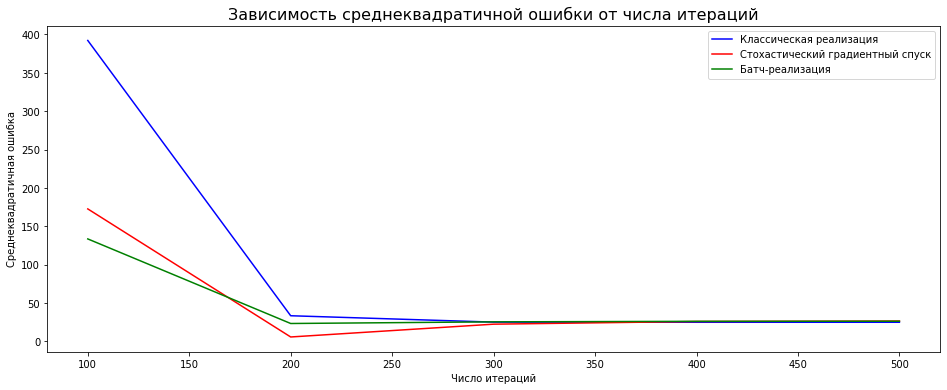

In [474]:
iter_mse(reg2_plots)

Выводы по сходимости аналогичные 3.1. Дополнительно можно отметить, что удалось лучше минимизировать функцию потерь (около 0,2 п.п.). На графике этого не видно, посмотрим по отчёту.

In [473]:
print('Без L2-регуляризации')
plots

Без L2-регуляризации


[('Классическая реализация',
  [100, 200, 300, 400, 500],
  [392.2210087203734,
   33.3674252506901,
   25.059960387061416,
   24.864221052727487,
   24.859558165950155]),
 ('Стохастический градиентный спуск',
  [100, 200, 300, 400, 500],
  [172.6417069214218,
   5.686821232335924,
   22.372040836084164,
   25.883270520387576,
   26.44562882415334]),
 ('Батч-реализация',
  [100, 200, 300, 400, 500],
  [133.51303713729504,
   23.25594752967763,
   25.402195119275596,
   26.10121549262888,
   26.21063739991045])]

In [475]:
print('L2-регуляризация')
reg2_plots

L2-регуляризация


[('Классическая реализация',
  [100, 200, 300, 400, 500],
  [382.49816557114303,
   33.17730954421607,
   25.056880004669807,
   24.86430454950277,
   24.85958484419112]),
 ('Стохастический градиентный спуск',
  [100, 200, 300, 400, 500],
  [172.6417069214218,
   5.686821232335924,
   22.372040836084164,
   25.883270520387576,
   26.44562882415334]),
 ('Батч-реализация',
  [100, 200, 300, 400, 500],
  [136.99871053078448,
   23.20078673909221,
   24.684523006621877,
   25.27876388599265,
   25.3720584454055])]

## 3.3. Заменить L2 регуляризацию на L1 регуляризацию.

![title](lasso_gradient.png)

In [4]:
def eval_gd_model_reg_1(X, y, iterations, alpha=None, lambda_=None):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    errors = []
    num_iterations = []
    
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot(X.T, (y_pred - y))) + 2 * ((lambda_* W)/np.abs(W)))
        
        if i % (iterations / 5) == 0:
            errors.append(err)
            num_iterations.append(i)
    
    return num_iterations, errors

In [22]:
%%time
num_iterations_gdreg1, errors_gdreg1 = eval_gd_model_reg_1(X, y, iterations=500, alpha=0.01, lambda_=1e-15)

Wall time: 35.9 ms


In [7]:
def eval_sgd_model_reg1(X, y, iterations=None, batch_size=None, alpha=None, lambda_=None):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // batch_size #количество элементов 
    if n % batch_size != 0: #если количество элементов нечётное
        n_batch += 1
    
    errors = []
    num_iterations = []
    
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = batch_size*b #вычисляем индексы объектов, которые должны попасть
            end_ = batch_size*(b+1) #вычисляем индексы объектов, которые должны попасть

            # print(b, n_batch, start_, end_)

            X_tmp = X[:, start_ : end_] #выбор элемента
            y_tmp = y[start_ : end_] #выбор элемента
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)) + 2 * ((lambda_* W)/np.abs(W)))

        if i % (iterations / 5) == 0:
            errors.append(err)
            num_iterations.append(i)
    
    return num_iterations, errors

In [9]:
%%time
num_iterations_sgdreg1, errors_sgdreg1 = eval_sgd_model_reg1(X.T, y, iterations=500, batch_size = 1, alpha=0.01, lambda_=1e-15)

Wall time: 23.7 s


In [10]:
%%time
num_iterations_batchreg1, errors_batchreg1 = eval_sgd_model_reg1(X.T, y, iterations=500, batch_size = 4, alpha=0.01, lambda_=1e-15)

Wall time: 6.14 s


In [21]:
errors_gdreg1

[383.16228473437934,
 33.16555794490315,
 25.055287238166493,
 24.864110231732695,
 24.859555500084397]

In [23]:
errors_sgdreg1

[176.77579881738052,
 5.590951760339483,
 22.34705075476634,
 25.87969510838173,
 26.445139880724252]

In [24]:
errors_batchreg1

[132.86216186780587,
 23.088788742198176,
 25.376757780172092,
 26.097459003582287,
 26.21008098805234]

Для стохастического градиента и батч реализации удалоась снизить значение MSE на около 0.01 п.п.